In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define complicated likelihood function

In [2]:
r = 2.0
w = 0.1
const = np.log(1.0 / np.sqrt(2.0*np.pi * w*w))
c1 = np.array([-3.5, 0.])
c2 = np.array([3.5, 0.])

def logcirc(theta, c):
    d = np.sqrt(np.sum((theta - c)**2, axis=-1))
    return const - (d - r)**2 / (2. * w**2)

def mn_loglike(theta):
   return np.logaddexp(logcirc(theta, c1), logcirc(theta, c2))

def prior(cube):
   return -6.0 + 12.0*cube

# Plot complicated likelihood function

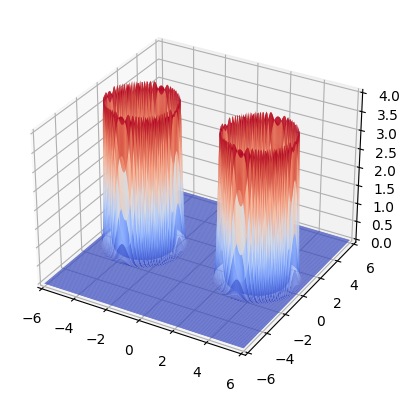

In [3]:
from mpl_toolkits.mplot3d import Axes3D

xx, yy = np.meshgrid(np.linspace(-6., 6., 200),
                     np.linspace(-6., 6., 200))
Z = np.exp(mn_loglike(np.dstack((xx, yy))))

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(xx, yy, Z, rstride=1, cstride=1, linewidth=0, cmap='coolwarm')
ax.set_xlim(-6., 6.)
ax.set_ylim(-6., 6.)
ax.set_zlim(0., 4.)

plt.show()

# Bayesian evidence with Multinest

In [4]:
import pymultinest

parameters = ["x", "y"]
ndim = len(parameters)

res = pymultinest.solve(mn_loglike, 
         prior,
         n_dims=ndim,
         n_live_points=500,
         outputfiles_basename='test_mn',
         importance_nested_sampling=False,
         sampling_efficiency=0.3, 
         multimodal=True,
         evidence_tolerance=1e-3,
         resume=False)

print(res)

print("Bayesian evidence from MN: logZ = {:.4} +/- {:.4}".format(res['logZ'], res['logZerr']))

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  500
 dimensionality =    2
 *****************************************************
 ln(ev)=  -1.6324341917296981      +/-   7.1048700040169138E-002
  analysing data from test_mn.txt
 Total Likelihood Evaluations:        15215
 Sampling finished. Exiting MultiNest
{'logZ': -1.632434191729698, 'logZerr': 0.07104870004016914, 'samples': array([[ 5.09444618, -1.67285514],
       [ 2.85251713, -2.21228099],
       [ 1.25991383, -0.52954951],
       ...,
       [ 5.48089814, -0.33413815],
       [ 5.47449178, -0.3609106 ],
       [ 5.45934817, -0.39765062]])}
Bayesian evidence from MN: logZ = -1.632 +/- 0.07105


# Bayesian evidence with Polychord

In [5]:
import pypolychord
from pypolychord.settings import PolyChordSettings

settings = PolyChordSettings(ndim, 0)
settings.file_root = 'test_pch'
settings.nlive = 500
settings.do_clustering = True
settings.read_resume = False
settings.feedback = 0

def pch_loglike(theta):
   return np.logaddexp(logcirc(theta, c1), logcirc(theta, c2)), []

res = pypolychord.run_polychord(pch_loglike, ndim, 0, settings, prior)

print("Bayesian evidence from PCh: logZ = {:.4} +/- {:.4}".format(res.logZ, res.logZerr))

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).



PolyChord: Next Generation Nested Sampling
copyright: Will Handley, Mike Hobson & Anthony Lasenby
  version: 1.20.1
  release: 1st June 2021
    email: wh260@mrao.cam.ac.uk

 ____________________________________________________ 
|                                                    |
| ndead  =         5643                              |
| log(Z) =           -1.79344 +/-            0.07442 |
|____________________________________________________|
Bayesian evidence from PCh: logZ = -1.793 +/- 0.07442


# Brute-force integration

In [6]:
from scipy.integrate import dblquad

res = dblquad(lambda y, x: np.exp(mn_loglike(np.array([x, y]))), -6.0, 6.0, lambda x: -6.0, lambda x: 6.0)

print("Bayesian evidence from quad: logZ = {:.4} +/- {:.4}".format(np.log(res[0]), res[1]/res[0]))

Bayesian evidence from quad: logZ = 3.224 +/- 3.857e-09
